In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
import glob

from fbprophet import Prophet
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)
from datetime import datetime, timedelta

In [2]:
df=pd.read_csv('pm2.5.csv')

In [4]:
df

,date,Year,Month,Day,Hour,NowCast Conc.,AQI,Raw Conc.
0,1/3/16 3:00,2016,3,1,3,251.4,302.0,289.0
1,1/3/16 4:00,2016,3,1,4,246.0,296.0,240.0
2,1/3/16 5:00,2016,3,1,5,264.0,314.0,290.0
3,1/3/16 6:00,2016,3,1,6,256.8,307.0,245.0
4,1/3/16 7:00,2016,3,1,7,238.2,288.0,205.0
...,...,...,...,...,...,...,...,...
30744,30/11/19 20:00,2019,11,30,20,143.9,197.0,176.0
30745,30/11/19 21:00,2019,11,30,21,176.4,227.0,209.0
30746,30/11/19 22:00,2019,11,30,22,201.2,251.0,226.0
30747,30/11/19 23:00,2019,11,30,23,202.6,253.0,204.0


In [5]:
frame=df

In [6]:
frame.shape

(30749, 8)

In [7]:
 #summarising number of missing values in each column
frame.isnull().sum()

date               0
Year               0
Month              0
Day                0
Hour               0
NowCast Conc.    367
AQI              369
Raw Conc.        415
dtype: int64

In [8]:
# percentage of missing values in each column
round(frame.isnull().sum()/len(frame.index), 2)*100

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


date             0.0
Year             0.0
Month            0.0
Day              0.0
Hour             0.0
NowCast Conc.    1.0
AQI              1.0
Raw Conc.        1.0
dtype: float64

In [9]:
frame['NowCast Conc.'].describe()

count    30382.000000
mean        81.397370
std         71.291682
min         -0.300000
25%         31.800000
50%         55.100000
75%        108.500000
max        739.700000
Name: NowCast Conc., dtype: float64

In [11]:
frame['NowCast Conc.' ].fillna(frame['NowCast Conc.'].median(), inplace=True)

In [12]:
# percentage of missing values in each column
round(frame.isnull().sum()/len(frame.index), 2)*100

date             0.0
Year             0.0
Month            0.0
Day              0.0
Hour             0.0
NowCast Conc.    0.0
AQI              1.0
Raw Conc.        1.0
dtype: float64

In [13]:
frame['NowCast Conc.'].describe()

count    30749.000000
mean        81.083502
std         70.922465
min         -0.300000
25%         32.100000
50%         55.100000
75%        107.200000
max        739.700000
Name: NowCast Conc., dtype: float64

# Imputing Missing Values

In [15]:
frame['NowCast Conc.'].fillna(frame['NowCast Conc.'].median(), inplace=True)
frame['AQI'].fillna(frame['AQI'].median(), inplace=True)

frame['Raw Conc.'].fillna(frame['Raw Conc.'].median(), inplace=True)


In [16]:
# percentage of missing values in each column
round(frame.isnull().sum()/len(frame.index), 2)*100

date             0.0
Year             0.0
Month            0.0
Day              0.0
Hour             0.0
NowCast Conc.    0.0
AQI              0.0
Raw Conc.        0.0
dtype: float64

In [17]:
frame.head(15)

,date,Year,Month,Day,Hour,NowCast Conc.,AQI,Raw Conc.
0,1/3/16 3:00,2016,3,1,3,251.4,302.0,289.0
1,1/3/16 4:00,2016,3,1,4,246.0,296.0,240.0
2,1/3/16 5:00,2016,3,1,5,264.0,314.0,290.0
3,1/3/16 6:00,2016,3,1,6,256.8,307.0,245.0
4,1/3/16 7:00,2016,3,1,7,238.2,288.0,205.0
5,1/3/16 8:00,2016,3,1,8,227.7,278.0,208.0
6,1/3/16 9:00,2016,3,1,9,206.3,256.0,178.0
7,1/3/16 10:00,2016,3,1,10,164.2,215.0,130.0
8,1/3/16 11:00,2016,3,1,11,197.1,247.0,230.0
9,1/3/16 12:00,2016,3,1,12,184.5,235.0,172.0


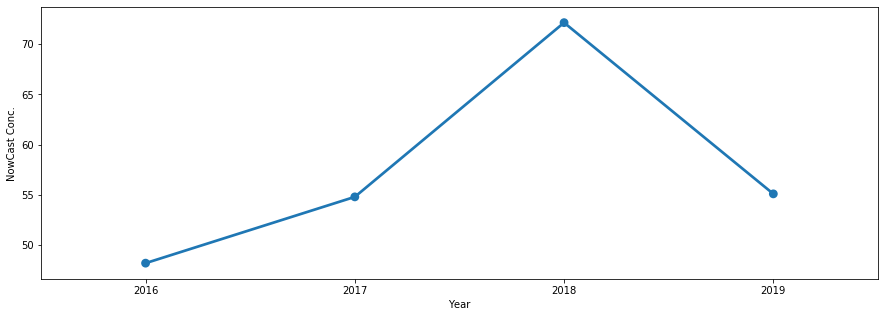

In [18]:
df = frame[['NowCast Conc.','Year']].groupby(["Year"]).median().reset_index().sort_values(by='Year',ascending=False)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='Year', y='NowCast Conc.', data=df)

In [20]:
df_2017 = frame[frame['Year']==2017]

In [21]:
df_2017.head()

,date,Year,Month,Day,Hour,NowCast Conc.,AQI,Raw Conc.
7341,1/1/17 0:00,2017,1,1,0,288.7,339.0,286.0
7342,1/1/17 1:00,2017,1,1,1,287.8,338.0,287.0
7343,1/1/17 2:00,2017,1,1,2,297.4,347.0,307.0
7344,1/1/17 3:00,2017,1,1,3,300.2,350.0,303.0
7345,1/1/17 4:00,2017,1,1,4,306.1,356.0,312.0


# Hourly Analysis of Pollutants in 2017

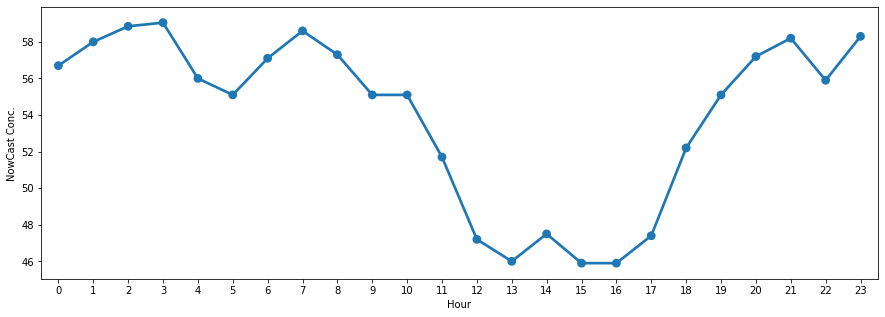

In [25]:
#Hourly-Analysis-of-Pollutants-in-2017
df = df_2017[['NowCast Conc.','Hour']].groupby(["Hour"]).median().reset_index().sort_values(by='Hour',ascending=False)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='Hour', y='NowCast Conc.', data=df)

In [36]:
# creating date field for further analysis by extracting day of the week, month etc.
df_2017['date']=pd.to_datetime(df_2017[['Year', 'Month', 'Day']])

/Users/hridoy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
# function to find day of the week based on the date field
import calendar
def findDay(date): 
    dayname = calendar.day_name[date.weekday()]
    return dayname

In [39]:
df_2017['day_week'] = df_2017['date'].apply(lambda x: findDay(x))
df_2017.head()

/Users/hridoy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,Year,Month,Day,Hour,NowCast Conc.,AQI,Raw Conc.,day_week
7341,2017-01-01,2017,1,1,0,288.7,339.0,286.0,Sunday
7342,2017-01-01,2017,1,1,1,287.8,338.0,287.0,Sunday
7343,2017-01-01,2017,1,1,2,297.4,347.0,307.0,Sunday
7344,2017-01-01,2017,1,1,3,300.2,350.0,303.0,Sunday
7345,2017-01-01,2017,1,1,4,306.1,356.0,312.0,Sunday


# Analysis of Pollutants in day of the week

In [40]:
custom_day = {'Monday':0, 'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6}

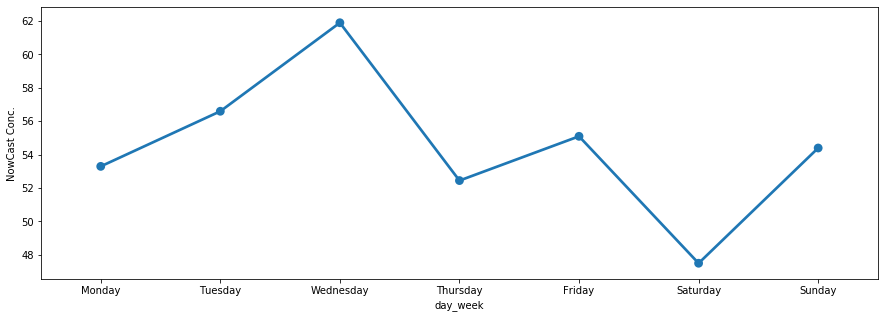

In [41]:
df = df_2017[['NowCast Conc.','day_week']].groupby(["day_week"]).median().reset_index().sort_values(by='day_week',ascending=True)
df = df.iloc[df['day_week'].map(custom_day).argsort()]
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='day_week', y='NowCast Conc.', data=df)

# Analysis of Pollutants monthwise in a year 2017

In [43]:
frame.Month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], inplace=True)

In [45]:
frame['Month'].value_counts()

Jul    2960
Mar    2959
May    2907
Nov    2870
Jun    2864
Apr    2786
Aug    2652
Dec    2208
Oct    2200
Sep    2180
Jan    2147
Feb    2016
Name: Month, dtype: int64

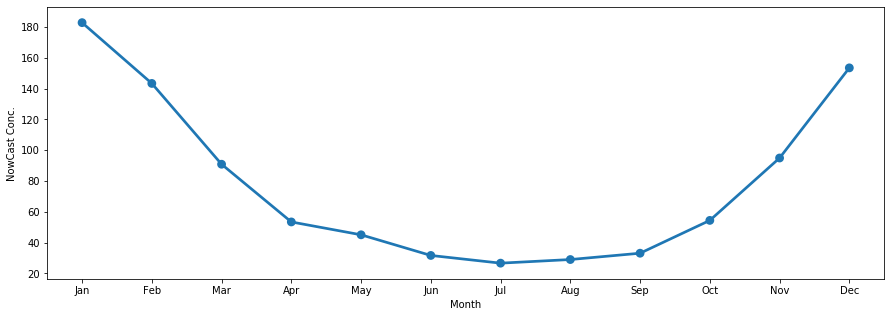

In [46]:
custom_dict = {'Jan':0, 'Feb':1,'Mar':2,'Apr':3,'May':4,'Jun':5,'Jul':6,'Aug':7,'Sep':8,'Oct':9,'Nov':10,'Dec':11}
df = frame[['NowCast Conc.','Month']].groupby(["Month"]).median().reset_index().sort_values(by='Month',ascending=True)
df = df.iloc[df['Month'].map(custom_dict).argsort()]
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='Month', y='NowCast Conc.', data=df)